In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
data = pd.read_csv('D:\\S.U.I.T.S\\Data Analytics and ML\\The Lannister Data Chronicles_ Decrypting Diabetes.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [28]:
data.shape

(253680, 22)

In [29]:
data = data.dropna(axis = 1)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [30]:
data.shape

(253680, 22)

In [31]:
y = data.iloc[:, 0].values      # target
X = data.iloc[:, 1:].values     # independent variables

print(X)
print(y)

[[1 1 1 ... 9 4 3]
 [0 0 0 ... 7 6 1]
 [1 1 1 ... 9 4 8]
 ...
 [0 0 1 ... 2 5 2]
 [1 0 1 ... 7 5 1]
 [1 1 1 ... 9 6 2]]
[0 0 0 ... 0 0 2]


# EDA

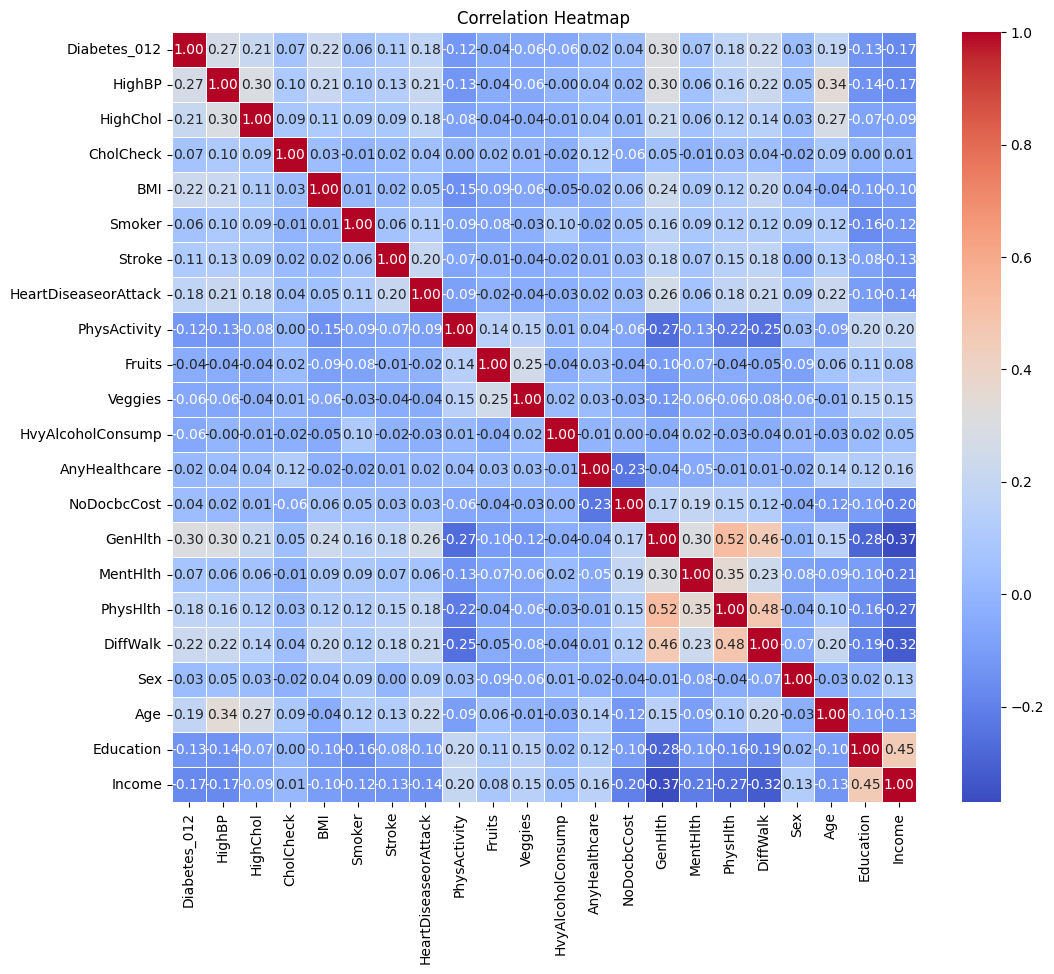

In [32]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
corr['Diabetes_012'].sort_values(ascending=False)

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

In [36]:
""" 
GenHlth
HighBP
BMI
DiffWalk
Age
HighChol
HeartDiseaseorAttack
PhysHlth
Income
Education
"""

data = data[['Diabetes_012','GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'Age', 'HighChol','HeartDiseaseorAttack','PhysHlth', 'Income', 'Education']]
data.head()

,Diabetes_012,GenHlth,HighBP,BMI,DiffWalk,Age,HighChol,HeartDiseaseorAttack,PhysHlth,Income,Education
0,0,5,1,40,1,9,1,0,15,3,4
1,0,3,0,25,0,7,0,0,0,1,6
2,0,5,1,28,1,9,1,0,30,8,4
3,0,2,1,27,0,11,0,0,0,6,3
4,0,2,1,24,0,11,1,0,0,4,5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16044\3948074161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x= data['Diabetes_012'], y=data['BMI'], palette='viridis')


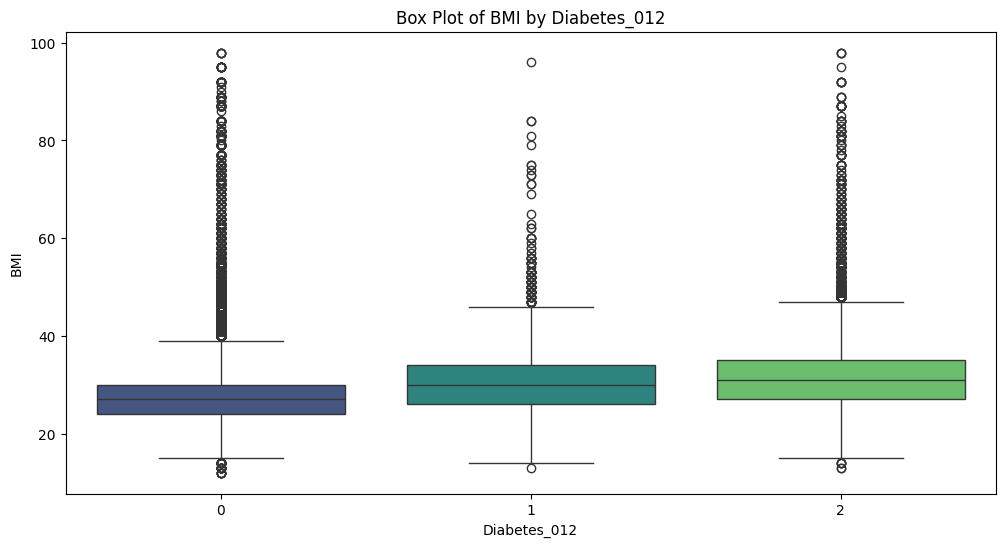

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x= data['Diabetes_012'], y=data['BMI'], palette='viridis')
plt.title('Box Plot of BMI by Diabetes_012')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16044\2738182388.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x=data['Diabetes_012'], y= data['BMI'], palette='viridis', ci='sd')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16044\2738182388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=data['Diabetes_012'], y= data['BMI'], palette='viridis', ci='sd')


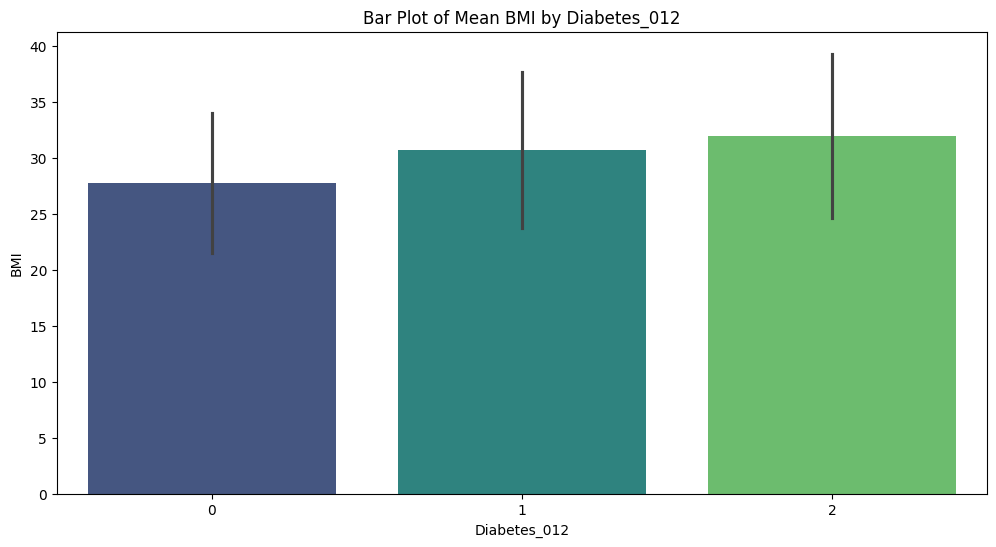

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x=data['Diabetes_012'], y= data['BMI'], palette='viridis', ci='sd')
plt.title('Bar Plot of Mean BMI by Diabetes_012')
plt.show()
plt.savefig('D:\\S.U.I.T.S\\BarPlot-BMI vs Target.png')